<a href="https://colab.research.google.com/github/kissup77/WEIO/blob/master/EEG_Pre_Processing_Pipeline_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing MNE and Dependencies**

In [2]:
#!setup.py install https://github.com/mne-tools/mne-python/archive/master.zip
#!pip uninstall mne   ## THE MOST RECENT VERSION: 0.21
!pip install -U mne # THE MOST RECENT **STABLE** VERSION: 0.20.7
#!pip install https://github.com/mne-tools/mne-python/archive/master.zip




import os.path as op
import os
import numpy as np
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pydoc import help
from scipy.stats.stats import pearsonr
!pip3 install git+https://github.com/sappelhoff/pyprep.git
!pip3 install pyprep
import os
import pathlib
import mne
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pyprep.prep_pipeline import PrepPipeline

#verifying version / system info
mne.sys_info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Uploading EDF files (EEG Data) into Google Colabs** 

In [ ]:

raw_data_file = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'EEG_GSR_Wellness_Tracker', 'AusEC.edf')
raw_data_file2 = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'mark_s_t3t4_EO.edf')

raw_data_csv = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'raw_eeg.csv')
#raw_5meo = os.path.join('/content/drive/', 'Shared with me', '5MeO',  '5MeODMT EE G DrJuan' ,'Jacob5MeO2min.edf')
raw_5meo2 = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'Jacob5MeO2min.edf')
raw_619 = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'Copy of Jacob619EC.EDF')
raw_5meo_post = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'jacob_post_meo.edf')
raw_5meo_619 = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'Copy of Jacob6195MeO.EDF')
raw_qtest_file = os.path.join('/content/drive/', 'My Drive', 'Colab Notebooks', 'Quintin Test 1_09.01.20_20.38.46.edf')
print(raw_data_file)
print(raw_data_csv)
print(raw_5meo2)
print(raw_qtest_file)
print(raw_5meo_post)
print(raw_5meo_619)


#Quintin's high valence dataset .edf: **I was not able to access it through these directions**
#raw_data_file = os.path.join('/content/drive/', 'My Drive', 'QRI [MASTER]', 'Projects', 'High Valence Data Collection', 'q_5.edf')

/content/drive/My Drive/Colab Notebooks/EEG_GSR_Wellness_Tracker/AusEC.edf
/content/drive/My Drive/Colab Notebooks/raw_eeg.csv
/content/drive/My Drive/Colab Notebooks/Jacob5MeO2min.edf
/content/drive/My Drive/Colab Notebooks/Quintin Test 1_09.01.20_20.38.46.edf
/content/drive/My Drive/Colab Notebooks/jacob_post_meo.edf
/content/drive/My Drive/Colab Notebooks/Copy of Jacob6195MeO.EDF


# **Getting Basic Information on EEG (EDF) Files (i.e. channel names, duration, filtering, sampling rate, etc.)**

In [ ]:
raw_data = mne.io.read_raw_edf(raw_data_file2)
print(raw_data.info)

raw_data_5m = mne.io.read_raw_edf(raw_5meo2)
print(raw_data_5m.info)

# raw_qtest = mne.io.read_raw_edf(raw_qtest_file)
# print(raw_qtest.info)

#MORE EXAMPLES BELOW:
#raw_data_5m.plot_sensors(ch_type = 'eeg')
#raw_data.plot_montage()


#raw_data_619 = mne.io.read_raw_edf(raw_619)
#print(raw_data_619.info)

#rpost_data = mne.io.read_raw_edf(raw_5meo_post)
#print(rpost_data.info)

#raw_data_5meo_619 = mne.io.read_raw_edf(raw_5meo_619)
#print(raw_data_5meo_619.info)

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/mark_s_t3t4_EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG T3-LE, EEG T4-LE
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2020-08-17 13:35:35 UTC
 nchan: 2
 projs: []
 sfreq: 256.0 Hz
>
Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Jacob5MeO2min.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: FP1-LE, FP2-LE, F7-LE, F3-LE, Fz-LE, F4-LE, F8-LE, T3-LE, C3-LE, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2018-06-19 19:14:08 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>


# Plotting Raw Data and Power Spectrum Density (PSD) Data of EDF Files

Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-7-46081e760c26>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=40, picks='EEG Pz-LE')


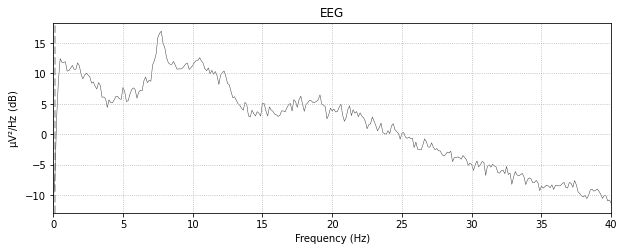

Effective window size : 8.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-7-46081e760c26>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.plot_psd(fmax=40, picks='EEG Pz-LE')


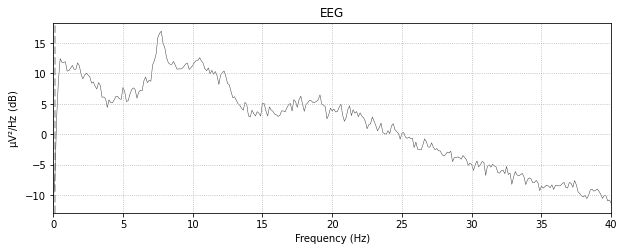

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


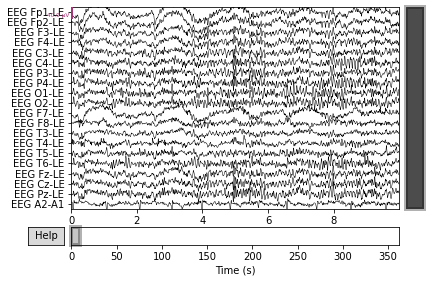

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-LE, FP2-LE, F7-LE, F3-LE, Fz-LE, F4-LE, F8-LE, T3-LE, C3-LE, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2018-06-19 19:14:08 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>
Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-7-46081e760c26>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data_5m.plot_psd(fmax=40, picks='Pz-LE')


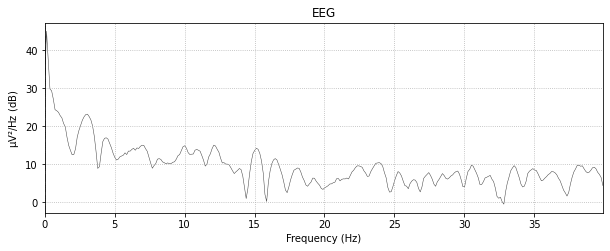

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


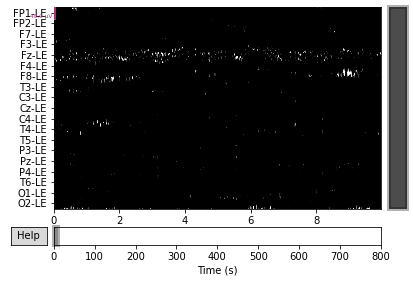

NameError: ignored

In [ ]:
raw_data.plot_psd(fmax=40, picks='EEG Pz-LE')
raw_data.plot_psd(fmax=40, picks='EEG Pz-LE')

raw_data.plot(block=True )
#raw_data.plot_sensors()
print(raw_data_5m.info)
raw_data_5m.plot_psd(fmax=40, picks='Pz-LE')
raw_data_5m.plot(block=True,)
#raw_data_5m.plot_sensors() 
raw_qtest.plot_psd(fmax=40)
raw_qtest.plot()
#raw_qtest.plot_sensors() 
rpost_data.plot_psd(fmax=40)


# Extracting Raw Data by Time and Channel and Saving to CSV File

           0             1      ...         92670         92671
0  -1.215093e-05 -1.135087e-05  ...  5.000381e-08  5.000381e-08
1  -2.500191e-07  1.950149e-06  ...  5.000381e-08  5.000381e-08
2  -5.050385e-06 -4.250324e-06  ...  5.000381e-08  5.000381e-08
3   3.850294e-06  5.950454e-06  ...  5.000381e-08  5.000381e-08
4   4.850370e-06  3.950301e-06  ...  5.000381e-08  5.000381e-08
5   2.150164e-06  3.350256e-06  ...  5.000381e-08  5.000381e-08
6   1.850141e-06  9.500725e-07  ...  5.000381e-08  5.000381e-08
7   1.650126e-06 -9.500725e-07  ...  5.000381e-08  5.000381e-08
8  -6.500496e-07 -4.150317e-06  ...  5.000381e-08  5.000381e-08
9   3.250248e-06 -9.500725e-07  ...  5.000381e-08  5.000381e-08
10 -1.485113e-05 -1.355103e-05  ...  5.000381e-08  5.000381e-08
11 -5.500420e-07  8.500649e-07  ...  5.000381e-08  5.000381e-08
12  1.050080e-06  1.450111e-06  ...  5.000381e-08  5.000381e-08
13  4.550347e-06  3.550271e-06  ...  5.000381e-08  5.000381e-08
14  5.500420e-07  5.500420e-07  ...  5.0

<ipython-input-12-e61afd06ce2e>:33: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_selection1.plot_psd(fmax=40)


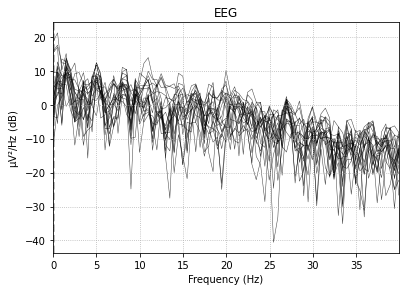

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Putting raw data into a dataframe format
data = raw_data.get_data()
data = pd.DataFrame(raw_data.get_data())
print(data)

data_5m = raw_data_5m.get_data()
data_5m = pd.DataFrame(raw_data_5m.get_data())

data_qtest = raw_qtest.get_data()
data_qtest = pd.DataFrame(raw_qtest.get_data())



# Transposing Raw Data so that Columns Correspond to Channels
data = data.T



#printing data frame of raw data after it has been transposed so that the channels are the columns
#print(data)
#print(data[[1]])



### Extracting  data by time, channel selection, and plotting this
#Selecting/Segmenting the data by time -checked-
raw_selection1 = raw_data.copy().crop(tmin=1, tmax=3)
data2 = pd.DataFrame(raw_selection1.get_data())
data3 = data2.T
#print(data2)


#now plot this segmented data: 
#raw_selection1.plot_psd(fmax=40)
#compare to raw_data.plot_psd(fmax=40)



#MORE IN DEPTH: Selecting/Segmenting data by BOTH time AND channel 
'''
# Note that this raw_selection is created as a tuple which does not work with graphing such as in the .plot_psd method
sampling_freq = raw_data.info['sfreq']
start_stop_seconds = np.array([11, 30])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 1
raw_selection = raw_data[channel_index, start_sample:stop_sample]
#print(raw_selection)

#Plotting this segmentation of time and channel
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)

'''


#extracting channels
'''
channel_names = ['EEG_C4-LE', 'EEG_C3-LE']
two_eeg_chans = raw_data[channel_names, start_sample:stop_sample]
#y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_eeg_chans[1]
y = two_eeg_chans[0].T #+ y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)
'''

# EXPORT RAW DATA (OR SELECTION OF DATA) TO CSV  - AND DOWNLOAD THE CSV

data3.to_csv("data.csv", index=False, header=False)
files.download("data.csv")



# Adding Digitization points manually (Digitization points are mappings of sensor locations with channel names - in many/most cases Digitization points must be added manually such as below)

In [ ]:
#CHOOSE WHICH RAW FILE TO RUN IN NEXT TWO LINES BELOW!!!
#raw = mne.io.read_raw_edf(raw_data_file, preload=True)
# THE EMOTIV FLEX EDF FILE IS CALLED: raw_qtest_file
raw = mne.io.read_raw_edf(raw_qtest_file, preload=True)
#raw = mne.io.read_raw_edf(raw_5meo2, preload=True)

print(raw.info)

print(raw.info['dig'])

ch_names = ['fp1', 'fp2', 'f3', 'f4', 'c3', 'c4', 'p3', 'p4', 'o1', 'o2', 'f7', 'f8', 't3', 't4', 't5', 't6', 'fz', 'cz', 'pz']
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)
raw.info = info
print(raw.info)

montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
raw.set_montage(montage, match_case=False, raise_if_subset=False)

#THIS confirms that we have now added the digitization points
print(raw.info['dig'])

#The plots below rely on digitzation points being added: 
#raw.plot_projs_topomap()
raw.plot_psd_topo()
raw.plot_sensors()
montage.plot()
#print(raw.info["sfreq"])
#raw.plot_projs_topomap()    #### OF COURSE THIS LEADS TO A ZERO DIVISION ERROR SINCE THERE ARE NO PROJECTIONS IN ANY OF OUR FILES AS INDICATED IN: print(raw.info)
#ICA.plot_components(raw)


Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Quintin Test 1_09.01.20_20.38.46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 41343  =      0.000 ...   322.992 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: TIME_STAMP_s, TIME_STAMP_ms, COUNTER, INTERPOLATED, Cz, Fz, Fp1, ...
 chs: 77 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2020-01-09 20:38:46 UTC
 nchan: 77
 projs: []
 sfreq: 128.0 Hz
>
None
<Info | 7 non-empty values
 bads: []
 ch_names: fp1, fp2, f3, f4, c3, c4, p3, p4, o1, o2, f7, f8, t3, t4, t5, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 256.0 Hz
>


TypeError: ignored

## Re-Referencing Data

In [ ]:
raw = mne.io.read_raw_edf(raw_data_file, preload=True)
print(raw.info['ch_names'])
# Re-reference from an average reference to the mean of channels
raw.set_eeg_reference(['EEG A2-A1'])     # set custom EEG reference
#raw.set_eeg_reference()  # set EEG average reference

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/EEG_GSR_Wellness_Tracker/AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   361.996 secs...
['EEG Fp1-LE', 'EEG Fp2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG Fz-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1']
EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEDF | AusEC.edf, 20 x 92672 (362.0 s), ~14.2 MB, data loaded>

## Epoching the Data - (This section will be completed once we have recordings to epoch in reference to keystrokes signifying entry and exit from Jhana states)

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/Quintin Test 1_09.01.20_20.38.46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 41343  =      0.000 ...   322.992 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: TIME_STAMP_s, TIME_STAMP_ms, COUNTER, INTERPOLATED, Cz, Fz, Fp1, ...
 chs: 77 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2020-01-09 20:38:46 UTC
 nchan: 77
 projs: []
 sfreq: 128.0 Hz
>
None
['TIME_STAMP_s', 'TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'TP9', 'CP5', 'CP1', 'P3', 'P7', 'O1', 'Pz', 'Oz', 'O2', 'P8', 'P4', 'CP2', 'CP6', 'TP10', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2', 'HighBitFlex', 'RAW_CQ', 'BATTERY', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_Cz', 'CQ_Fz', 'CQ_Fp1', 'CQ_F7', 'CQ_F3', 'CQ_FC1', 'CQ_C3', 'CQ_FC5', 'CQ_FT9', 'CQ_T7', 'CQ_TP9', 

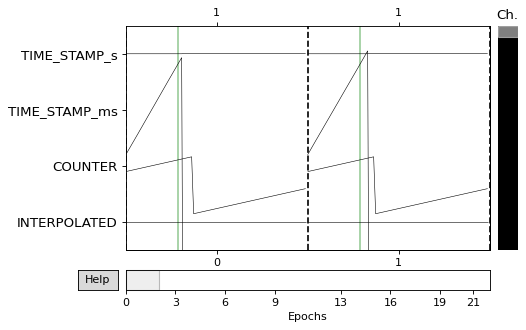

Loading data for 22 events and 91 original time points ...
22 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<ipython-input-18-00cda9d263e1>:48: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(1, cmap='interactive', sigma=1., vmin=-250, vmax=250)


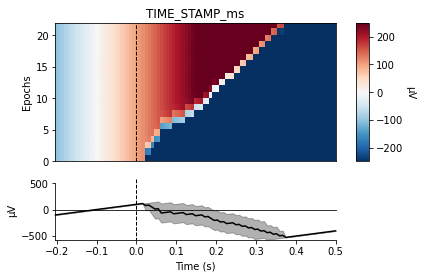

RuntimeError: ignored

In [ ]:

#CHOOSE WHICH RAW FILE TO RUN IN NEXT TWO LINES BELOW!!!
# THE EMOTIV FLEX EDF FILE IS CALLED: raw_qtest_file

raw = mne.io.read_raw_edf(raw_qtest_file, preload=True)
print(raw.info)
print(raw.info['dig'])
print(raw.info['ch_names'])
#print(raw.info['ch_names']['MarkerValueInt']) # THIS ONE DOES NOT WORK- NOT SURE HOW TO SPECIFICALLY PRINT THAT CHANNEL

####events = mne.find_events(raw, stim_channel='MarkerValueInt')
#raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6)    #ValueError: No channels match the selection.

# WE DONT HAVE EVENT DICT YET BUT THIS WILL PROBABLY BE IMPORTANT SOON
#event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,   #ValueError: No matching events found for auditory/left (event id 1)
#              'visual/right': 4, 'face': 5, 'buttonpress': 32}


####picks = 'MarkerValueInt'
#raw.plot(picks=picks)

#raw.copy().pick_types(eeg=False, stim=True).plot(start=3, duration=6)   # ValueError: No channels match the selection.- LOOKS LIKE THE STIM CHANNEL ON FLEX IS NOT LABELED AS STIM

#epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, picks=picks, preload=True)
#If you forget to provide the event dictionary to the Epochs constructor, you can add it later by assigning to the event_id attribute:
#epochs.event_id = event_dict


#epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7)

#print(epochs)

#print(epochs.event_id)

#epochs.plot(n_epochs=10)


new_events = mne.make_fixed_length_events(raw, start=5, stop=50, duration=2.)
#eventss = mne.events_from_annotations(raw)
#events = mne.find_events(new_events)
epochs = mne.Epochs(raw, new_events, event_id=None, tmin=-0.2, tmax=0.5, baseline=(None, 0), picks=None, preload=False, reject=None, flat=None, proj=True, decim=1, reject_tmin=None, reject_tmax=None, detrend=None, on_missing='error', reject_by_annotation=True, metadata=None, event_repeated='error', verbose=None)
mne.viz.plot_epochs(epochs, picks=None, scalings=None, n_epochs=2, n_channels=4, title=None, events=None, event_colors=None, order=None, show=True, block=False, decim='auto', noise_cov=None, butterfly=False, show_scrollbars=True, epoch_colors=None)
# THIS ONE ABOVE SHOWS THE EPOCHS FOR EACH CHANNEL (EPOCHS = TIME),
# AND THE PLOT IS WAYY LESS FUZZY THAN THE raw.plot() PLOT!!!!!
# OR THE FILTERED PLOTS WHEN FILTERING EITHER RAW OR WITH EPOCHS
# *** ALSO YOU CAN CHANGE NUM OF CHANNELS BY AN ARGUMENT

epochs.plot_image(1, cmap='interactive', sigma=1., vmin=-250, vmax=250)
# *** This one gives 2 in one fancy color plot of uV vs epochs, but for some
#*** reason is only giving a very small time segment,
#*** the first argument '1' signifies which electrode is being looked at 1 = fp2, and 2 = f3 (both compared to LE)
#*** also if you change the tmax in Epochs above, you will extend the time shown in the graph


#raw.plot_psd_topomap(ch_type='eeg', normalize=True)   #### --> AttributeError: 'RawEDF' object has no attribute 'plot_psd_topomap'
epochs.plot_psd_topomap(ch_type='eeg', normalize=True, tmin=0, tmax=15.0)
epochs.plot_psd_topomap(ch_type='eeg', normalize=True, tmin=1, tmax=2.0)
#mne.time_frequency.psd_multitaper(raw)

#power.plot_joint(baseline=(-0.5, 0), mode='mean', tmin=-.5, tmax=2, timefreqs=[(.5, 10), (1.3, 8)])



raw.plot_psd_topo()

#epochs.plot_psd_topo() #AttributeError: 'Epochs' object has no attribute 'plot_psd_topo'




## Find Global Rejection Threshold for Dataset - in order to do ICA

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/EEG_GSR_Wellness_Tracker/AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   361.996 secs...
Not setting metadata
Not setting metadata
22 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 22 events and 180 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 0.00010950835431448844}


/usr/local/lib/python3.6/dist-packages/autoreject/autoreject.py:220: RuntimeWarning: The measurement information indicates a low-pass frequency of 50 Hz. The decim=2 parameter will result in a sampling frequency of 128 Hz, which can cause aliasing artifacts.
  epochs.decimate(decim=decim)


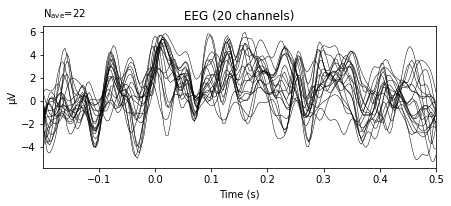

Loading data for 22 events and 180 original time points ...
    Rejecting  epoch based on EEG : ['EEG P3-LE']
1 bad epochs dropped


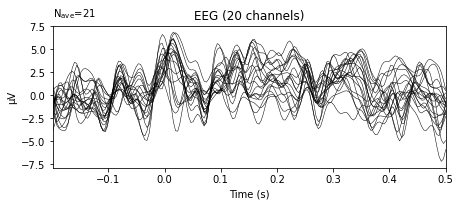

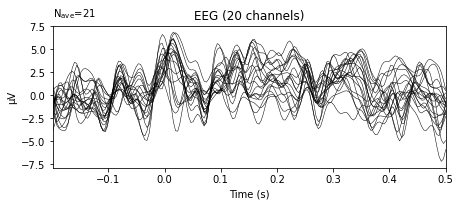

In [ ]:
#!pip install https://api.github.com/repos/autoreject/autoreject/zipball/master
#!python -c 'import autoreject'

from autoreject import AutoReject
ar = AutoReject()

import mne
from mne import io

raw = mne.io.read_raw_edf(raw_data_file, preload=True)


new_events = mne.make_fixed_length_events(raw, start=5, stop=50, duration=2.)
#eventss = mne.events_from_annotations(raw)
#events = mne.find_events(new_events)
epochs = mne.Epochs(raw, new_events, event_id=None, tmin=-0.2, tmax=0.5, baseline=(None, 0), picks=None, preload=False, reject=None, flat=None, proj=True, decim=1, reject_tmin=None, reject_tmax=None, detrend=None, on_missing='error', reject_by_annotation=True, metadata=None, event_repeated='error', verbose=None)


'''
events = mne.read_events(event_fname)



include = []
picks = mne.pick_types(raw.info, meg=True, eeg=True, stim=False,
                       eog=False, include=include, exclude='bads')
epochs = mne.Epochs(raw, events, event_id, tmin, tmax,
                    picks=picks, baseline=(None, 0), preload=True,
                    reject=None, verbose=False, detrend=1)

'''
from autoreject import get_rejection_threshold  # noqa

# We can use the `decim` parameter to only take every nth time slice.
# This speeds up the computation time. Note however that for low sampling
# rates and high decimation parameters, you might not detect "peaky artifacts"
# (with a fast timecourse) in your data. A low amount of decimation however is
# almost always beneficial at no decrease of accuracy.
reject = get_rejection_threshold(epochs, decim=2)

print('The rejection dictionary is %s' % reject)

epochs.average().plot()
epochs.drop_bad(reject=reject)
epochs.average().plot()

## RUN ICA

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/EEG_GSR_Wellness_Tracker/AusEC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   361.996 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: fp1, fp2, f3, f4, c3, c4, p3, p4, o1, o2, f7, f8, t3, t4, t5, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 256.0 Hz
>
[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 102.7, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.2, 0.0, 0.0) mm       : head frame>, <DigPoint |     EEG #1 : (-28.2, 102.3, 31.7) mm   : head frame>, <DigPoint |     EEG #3 : (28.6, 103.2, 31.6) mm    : head frame>, <DigPoint |    EEG #16 : (-67.4, 62.3, 30.5) mm    : head frame>, <DigPoint |    EEG #18 : (-48.2, 76.3, 80.9) mm    : head frame>, <DigPoint |    EEG #20 : (0.3, 83

<ipython-input-21-1882c2631337>:44: DeprecationWarning: Using ``raise_if_subset`` to ``set_montage``  is deprecated and ``set_dig`` will be  removed in 0.21
  raw.set_montage(montage, match_case=False, raise_if_subset=False)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
    Rejecting  epoch based on EEG : ['t6']
Artifact detected in [1881, 2052]
    Rejecting  epoch based on EEG : ['t6']
Artifact detected in [3933, 4104]
    Rejecting  epoch based on EEG : ['fp1', 'fp2', 'f7']
Artifact detected in [5643, 5814]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [5814, 5985]
    Rejecting  epoch based on EEG : ['c4', 'p4', 'cz']
Artifact detected in [6498, 6669]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [6669, 6840]
    Rejecting  epoch based on EEG : ['p4', 'o2']
Artifact detected in [8037, 8208]
    Rejecting  epoch based on EEG : ['cz']
Artifact detected in [8550, 8721]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [9405, 9576]
    Rejecting  epoch based on EEG : ['p4', 'pz']
Artifact detected in [11628, 11799]
    Rejecting  epoch based on EEG : ['p4']
Ar

[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.2s finished


Fitting ICA took 1.0s.
<ICA  |  raw data decomposition, fit (fastica): 24624 samples, 19 components, channels used: "eeg">


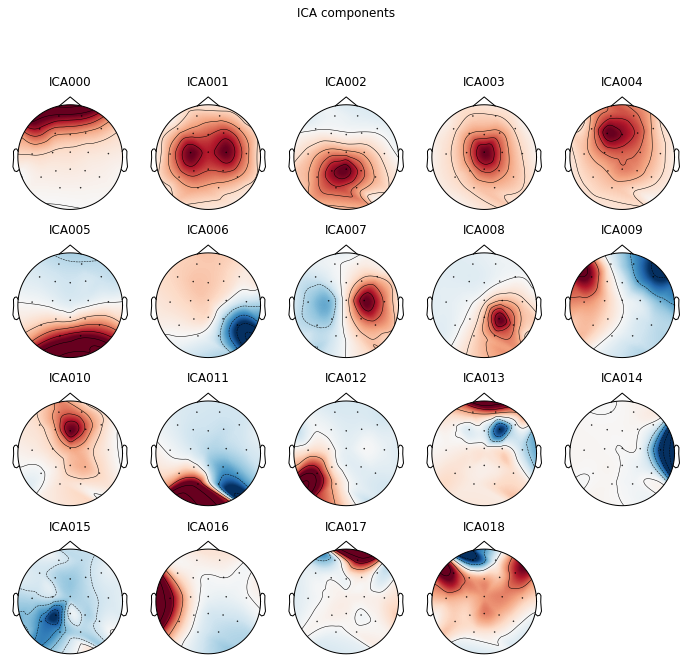

    Rejecting  epoch based on EEG : ['t6']
Artifact detected in [5632, 6144]
    Rejecting  epoch based on EEG : ['p3']
Artifact detected in [9728, 10240]
    Rejecting  epoch based on EEG : ['t6']
Artifact detected in [11776, 12288]
    Rejecting  epoch based on EEG : ['fp1', 'fp2', 'f7']
Artifact detected in [16896, 17408]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [17408, 17920]
    Rejecting  epoch based on EEG : ['p4']
Artifact detected in [19456, 19968]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [19968, 20480]
    Rejecting  epoch based on EEG : ['p4', 'o2', 't6']
Artifact detected in [24064, 24576]
    Rejecting  epoch based on EEG : ['cz']
Artifact detected in [25600, 26112]
    Rejecting  epoch based on EEG : ['fp1', 'fp2']
Artifact detected in [28160, 28672]
    Rejecting  epoch based on EEG : ['p4', 'o1', 'pz']
Artifact detected in [34816, 35328]
    Rejecting  epoch based on EEG : ['p4', 'pz']
Artifact detected in [3

IndexError: ignored

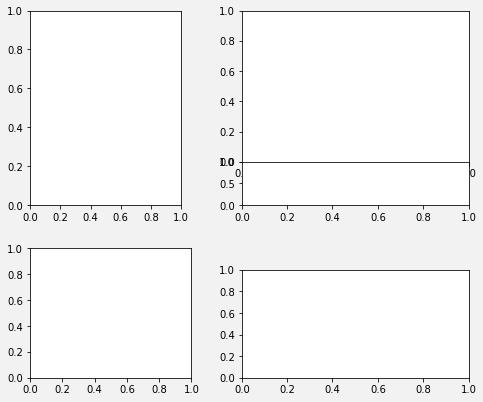

In [ ]:
'''
ICA finds directions in the feature space corresponding to projections with high non-Gaussianity. We thus obtain a decomposition into independent 
components, and the artifact’s contribution is localized in only a small number of components. These components have to be correctly identified and 
removed.
If EOG or ECG recordings are available, they can be used in ICA to automatically select the corresponding artifact components from the decomposition. 
To do so, you have to first build an Epoch object around blink or heartbeat event.
'''
import numpy as np
import mne
from mne.datasets import sample
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs
from time import time
import mne
from mne.preprocessing import ICA

#raw_5meo2   or    raw_data_file
raw = mne.io.read_raw_edf(raw_data_file, preload=True)

ch_names = ['fp1', 'fp2', 'f3', 'f4', 'c3', 'c4', 'p3', 'p4', 'o1', 'o2', 'f7', 'f8', 't3', 't4', 't5', 't6', 'fz', 'cz', 'pz']
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)
raw.info = info
print(raw.info)

montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
#raw.set_montage(montage, match_case=False)
raw.set_montage(montage, match_case=False, raise_if_subset=False)

print(raw.info['dig'])


raw.filter(1, 40, n_jobs=2)  # 1Hz high pass is often helpful for fitting ICA

picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True, eog=False,
                           stim=False, exclude='bads')


#ICA PARAMETERS
n_components = 19  # if float, select n_components by explained variance of PCA
method = 'fastica'  # for comparison with EEGLAB try "extended-infomax" here
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23


#Define the ICA object instance

ica = ICA(n_components=n_components, method=method, random_state=random_state)
#print(ica)


#we avoid fitting ICA on crazy environmental artifacts that would dominate the variance and decomposition
reject = dict(eeg=0.00010950835431448844)
ica.fit(raw, picks=picks_eeg, decim=decim, reject=reject)

'''
from time import time

import mne
from mne.preprocessing import ICA
from mne.datasets import sample
def run_ica(method, fit_params=None):
    ica = ICA(n_components=20, method=method, fit_params=fit_params,
              random_state=0)
    t0 = time()
    ica.fit(raw, picks=picks_eeg, reject=reject)
    fit_time = time() - t0
    title = ('ICA decomposition using %s (took %.1fs)' % (method, fit_time))
    ica.plot_components(title=title)


run_ica('infomax', fit_params=dict(extended=True))
'''
print(ica)
#### WHEN REJECT IS eeg=5e-2, or 5e-4, or 5e-5) = THERE IS AN ASSERTION ERROR WITH NOTHING THAT IS HELPFUL, WHEN eeg=5e-14) on the 5meo-2min
# file there are many artifacts listed as rejected, but the error at the end is RuntimeError: No clean segment found. Please 
#consider updating your rejection thresholds
#when rejection is 5e-09, or 5e-08, or5e-6,  on same 5meo-2min file: RuntimeError: No clean segment found. Please consider updating your rejection thresholds.


ica.plot_components() 

# first, component 0:
ica.plot_properties(raw, picks=1)

## Running PyPREP Successfully

Extracting EDF parameters from /content/drive/My Drive/Colab Notebooks/mark_s_t3t4_EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 460799  =      0.000 ...  1799.996 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG T3-LE, EEG T4-LE
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2020-08-17 13:35:35 UTC
 nchan: 2
 projs: []
 sfreq: 256.0 Hz
>
None
[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 102.7, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.2, 0.0, 0.0) mm       : head frame>, <DigPoint |    EEG #87 : (-80.7, 6.6, 36.6) mm     : head frame>, <DigPoint |    EEG #89 : (81.5, 7.5, 36.5) mm      : head frame>]
['T3', 'T4']
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


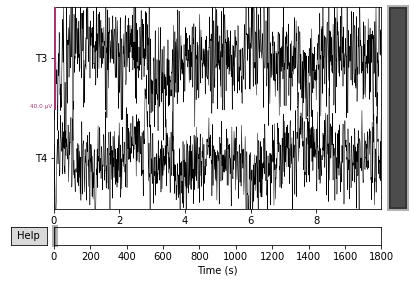

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)

Removed notch frequencies (Hz):
     60.00 :  718 windows
    120.00 :  718 windows
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass,

OSError: ignored

In [ ]:
import os.path as op
import os
import numpy as np
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pydoc import help
from scipy.stats.stats import pearsonr
import pathlib
import scipy.io as sio
from pyprep.prep_pipeline import PrepPipeline


raw = mne.io.read_raw_edf(raw_data_file2, preload=True)
print(raw.info)
print(raw.info['dig'])



raw.rename_channels(lambda s: s.split(' ')[1].split('-')[0])

# The eegbci data has non-standard channel names. We need to rename them:
mne.datasets.eegbci.standardize(raw)

montage_kind = "standard_1020"
montage =  mne.channels.make_standard_montage(montage_kind)
#raw.set_montage(montage, match_case=False)
raw.set_montage(montage, match_case=False, on_missing='ignore')
#in version 20.5 (stable) instead of: on_missing='ignore' it is raise_if_subset=False
print(raw.info['dig'])

eeg_index = mne.pick_types(raw.info, eeg=True, eog=False, meg=False)
#print(eeg_index)

ch_names_eeg = list(np.asarray(raw.ch_names)[eeg_index])
print(ch_names_eeg)
sample_rate = raw.info["sfreq"]


# Make a copy of the data
raw_copy = raw.copy()


freqs = (60, 120)
raw_copy.notch_filter(freqs=freqs,)
raw_copy.plot(block=True)

###############################################################################
# Set PREP parameters and run PREP
# --------------------------------
#
# Notes: we keep all the default parameter settings as described in the PREP
# paper except one, the fraction of bad time windows
# (we change it from 0.01 to 0.1), because the EEG data is 60s long, which
# means it gots only 60 time windows. We think the algorithm will be too
# sensitive if using the default setting.

# Fit prep
prep_params = {'ref_chs': ch_names_eeg,
               'reref_chs': ch_names_eeg,
               'line_freqs': np.arange(60, sample_rate/2, 60)}
prep = PrepPipeline(raw_copy, prep_params, montage)
prep.fit()


raw_copy.plot(block=True)

#checking bad channels by PyPREP
print("Bad channels: {}".format(prep.interpolated_channels))
print("Bad channels original: {}".format(prep.noisy_channels_original["bad_all"]))
print("Bad channels after interpolation: {}".format(prep.still_noisy_channels))


## Compare PyPrep Plots with Un-Pre-Processed Data by Plotting:

Effective window size : 8.000 (s)


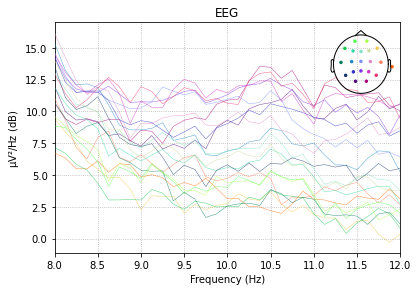

Effective window size : 8.000 (s)


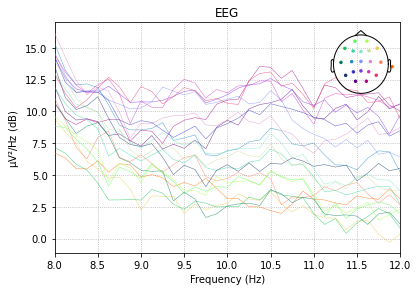

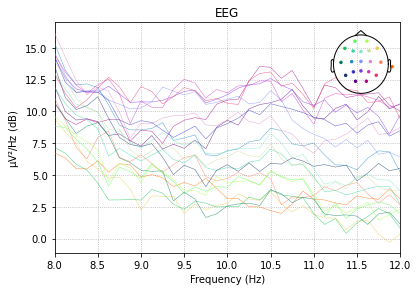

In [ ]:
'''
raw.sdf = raw
raw_copy == raw
raw.plot_psd(fmin = 8., fmax= 12.)
raw.plot
#raw.sdf == raw
raw_copy.plot_psd(fmin = 8., fmax= 12.)
'''




Testing EntroPy

In [ ]:
#!setup.py install https://github.com/mne-tools/mne-python/archive/master.zip
#!pip uninstall mne   ## THE MOST RECENT VERSION: 0.21
##!pip install -U mne # THE MOST RECENT **STABLE** VERSION: 0.20.7
#!pip install https://github.com/mne-tools/mne-python/archive/master.zip

#git clone https://github.com/raphaelvallat/entropy.git entropy/
#cd entropy/
!pip install https://github.com/raphaelvallat/entropy.git
!pip install -r requirements.txt
!setup.py develop

     \ 184kB 284kB/s
  ERROR: Cannot unpack file /tmp/pip-unpack-52ech0t3/entropy.git (downloaded from /tmp/pip-req-build-m7atcv92, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-m7atcv92
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
/bin/bash: setup.py: command not found
